In [20]:
import scipy.io.wavfile
import glob
import os
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import math
from librosa import stft, istft

## Part1

In [10]:
def get_power_spectrum(file):
    sampling_rate, signal = wavfile.read(file)
    data = signal.sum(axis=1) / 2 
    freq_nq = len(data) // 2   
    power_spectrum= (abs(np.fft.fft(data))[:freq_nq] / len(signal) * 2) ** 2
    frequency = fft.fftfreq(len(signal), 1/sampling_rate)[:freq_nq]
    return frequency, power_spectrum

In [54]:
def plot_power_spectrum(frequency, power_spectrum):
    plt.plot(frequency, power_spectrum)
    plt.xlim([0, 1000])
    plt.xlabel('Frequency')
    plt.ylabel('Power spectrum')
    plt.show()

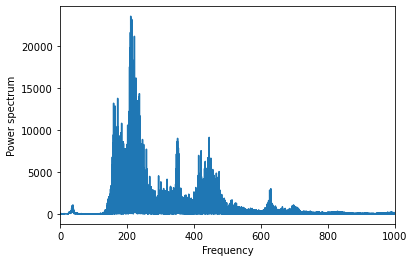

In [55]:
frequency, power_spectrum = get_power_spectrum('voices/v0.wav')
plot_power_spectrum(frequency, power_spectrum)

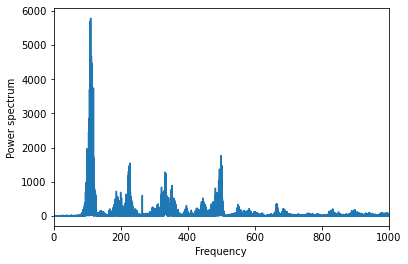

In [56]:
frequency, power_spectrum = get_power_spectrum('voices/v1.wav')
plot_power_spectrum(frequency, power_spectrum)

In [14]:
def get_max_power_freq(file):
    frequency, power_spectrum = get_power_spectrum(file)
    return frequency[np.argmax(power_spectrum)]

In [59]:
def recognize_gender(folder):
    labels = {}
    max_freqs = {}
    for file in glob.glob(folder+'/*.wav'):
        max_freq = get_max_power_freq(file) 
        max_freqs[file] = max_freq
        if max_freq <= 180 :
            labels[file] = 'man'
        else:
            labels[file] = 'woman'
                
    return labels, max_freqs

In [60]:
labels, max_freqs = recognize_gender('voices')
labels = sorted(labels.items())
print(labels)

[('voices/v0.wav', 'woman'), ('voices/v1.wav', 'man'), ('voices/v10.wav', 'woman'), ('voices/v11.wav', 'man'), ('voices/v2.wav', 'man'), ('voices/v3.wav', 'man'), ('voices/v4.wav', 'woman'), ('voices/v5.wav', 'woman'), ('voices/v6.wav', 'man'), ('voices/v7.wav', 'woman'), ('voices/v8.wav', 'man'), ('voices/v9.wav', 'woman')]


In [62]:
max_freqs = sorted(max_freqs.items())
print(max_freqs)

[('voices/v0.wav', 211.0202202322809), ('voices/v1.wav', 110.43235723920863), ('voices/v10.wav', 218.0506359746872), ('voices/v11.wav', 128.9516661222912), ('voices/v2.wav', 50.047482262404), ('voices/v3.wav', 131.32155104194143), ('voices/v4.wav', 283.72423274871784), ('voices/v5.wav', 205.48636114308582), ('voices/v6.wav', 86.5617607694223), ('voices/v7.wav', 181.34491467004406), ('voices/v8.wav', 149.89958292986054), ('voices/v9.wav', 180.00235293348715)]


## Part2

In [41]:
def awgn(signal, sampling_rate, SNR) :
    
    new_signal = sqrt(np.mean(signal ** 2))
    tmp = sqrt(new_signal ** 2 / (pow(10, SNR / 10)))
    noise =(np.random.normal(0, tmp, signal.shape[0])).astype(np.float32)
    noisy_signal = signal + noise
    return noisy_signal, noise

In [63]:
def spectral_subtraction(noisy_signal, noise, sampling_rate):
    fft_noisy_signal = stft(noisy_signal)
    abs_fft_noisy_signal = np.abs(fft_noisy_signal)
    
    fft_noise = stft(noise)
    abs_fft_noise = np.abs(fft_noise)
    
    
    theta = np.angle(fft_noisy_signal)
    y = np.exp(1.0j * theta)

    average_fft_noise = np.mean(abs_fft_noise, axis=1)

    denoisy_signal = istft((abs_fft_noisy_signal - average_fft_noise.reshape((average_fft_noise.shape[0], 1))) * y)
    denoisy_signal = denoisy_signal.astype(np.int16)
    return denoisy_signal

In [69]:
def plot_signal(filename):
    sampling_rate, data = wavfile.read(filename)
    signal = data.astype(np.float32)
    n = signal.shape[0] / sampling_rate
    t = np.linspace(0, n, signal.shape[0])
    plt.plot(t, signal)
    plt.show()

### SNR = 1

In [78]:
sampling_rate, data = wavfile.read('Test.wav')
signal = data.astype(np.float32)
noisy_signal, noise = awgn(signal, sampling_rate, 1)
wavfile.write('noisy_signal.wav', sampling_rate, noisy_signal.astype(np.int16))
denoisy_signal = spectral_subtraction(noisy_signal, noise, sampling_rate)
wavfile.write('denoise_signal.wav', sampling_rate, denoisy_signal)

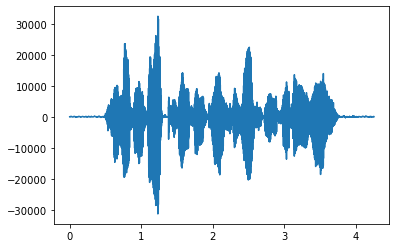

In [79]:
plot_signal('Test.wav')

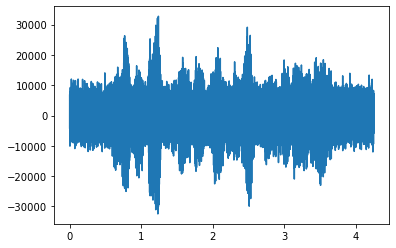

In [80]:
plot_signal('noisy_signal.wav')

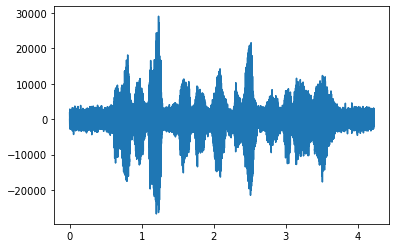

In [81]:
plot_signal('denoise_signal.wav')

### SNR = 0.5

In [86]:
sampling_rate, data = wavfile.read('Test.wav')
signal = data.astype(np.float32)
noisy_signal, noise = awgn(signal, sampling_rate, 0.5)
wavfile.write('noisy_signal.wav', sampling_rate, noisy_signal.astype(np.int16))
denoisy_signal = spectral_subtraction(noisy_signal, noise, sampling_rate)
wavfile.write('denoise_signal.wav', sampling_rate, denoisy_signal)

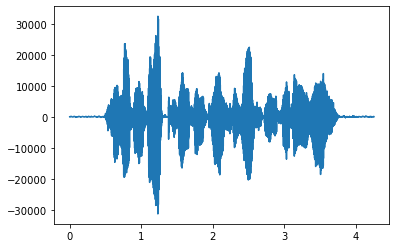

In [87]:
plot_signal('Test.wav')

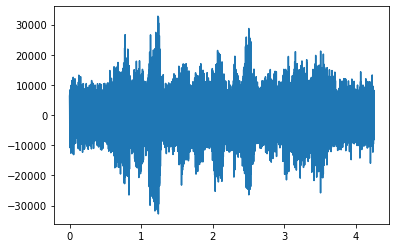

In [88]:
plot_signal('noisy_signal.wav')

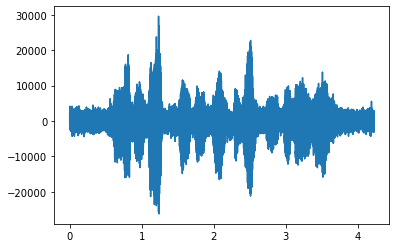

In [89]:
plot_signal('denoise_signal.wav')

### SNR = 4

In [102]:
sampling_rate, data = wavfile.read('Test.wav')
signal = data.astype(np.float32)
noisy_signal, noise = awgn(signal, sampling_rate, 4)
wavfile.write('noisy_signal.wav', sampling_rate, noisy_signal.astype(np.int16))
denoisy_signal = spectral_subtraction(noisy_signal, noise, sampling_rate)
wavfile.write('denoise_signal.wav', sampling_rate, denoisy_signal)

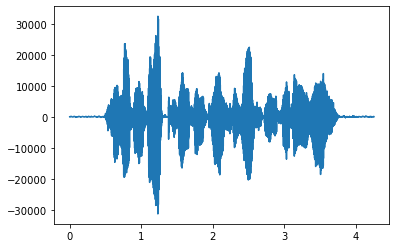

In [103]:
plot_signal('Test.wav')

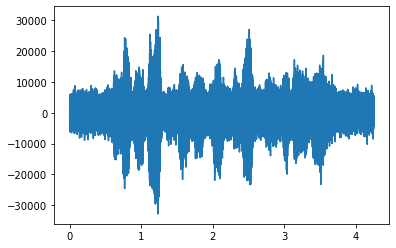

In [104]:
plot_signal('noisy_signal.wav')

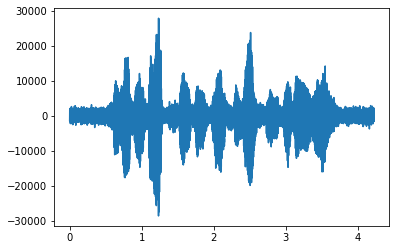

In [105]:
plot_signal('denoise_signal.wav')